In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("****************************************************ANALYSIS**********************************************************\n\n\t\t\t\tProject topic:-Diamond Price Prediction\n\n\t(1)Took Data set from kaggle\n\n\t(2)I will be doing Exeploratary Data Analysis using Numpy,pandas,matplotlib and seaborn.\n\n\t(3)Will be making prediction models using number of machine learning regression algorithms.")

****************************************************ANALYSIS**********************************************************

				Project topic:-Diamond Price Prediction

	(1)Took Data set from kaggle

	(2)I will be doing Exeploratary Data Analysis using Numpy,pandas,matplotlib and seaborn.

	(3)Will be making prediction models using number of machine learning regression algorithms.


In [3]:
df = pd.read_csv('diamonds.csv')

carat (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats. One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs.

cut  (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.

color, from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.

clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.

Dimensions

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 11)

# Exploratry Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


The first column is an index ("Unnamed: 0") and thus we are going to remove it.

In [7]:
df = df.drop('Unnamed: 0' ,axis = 1)

In [8]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [10]:
df = df.drop(df[df['x']==0].index)
df = df.drop(df[df['y']==0].index)
df = df.drop(df[df['z']==0].index)
df.shape

(53920, 10)

We lost 20 data points by deleting the dimensionless(2-D or 1-D) diamonds.

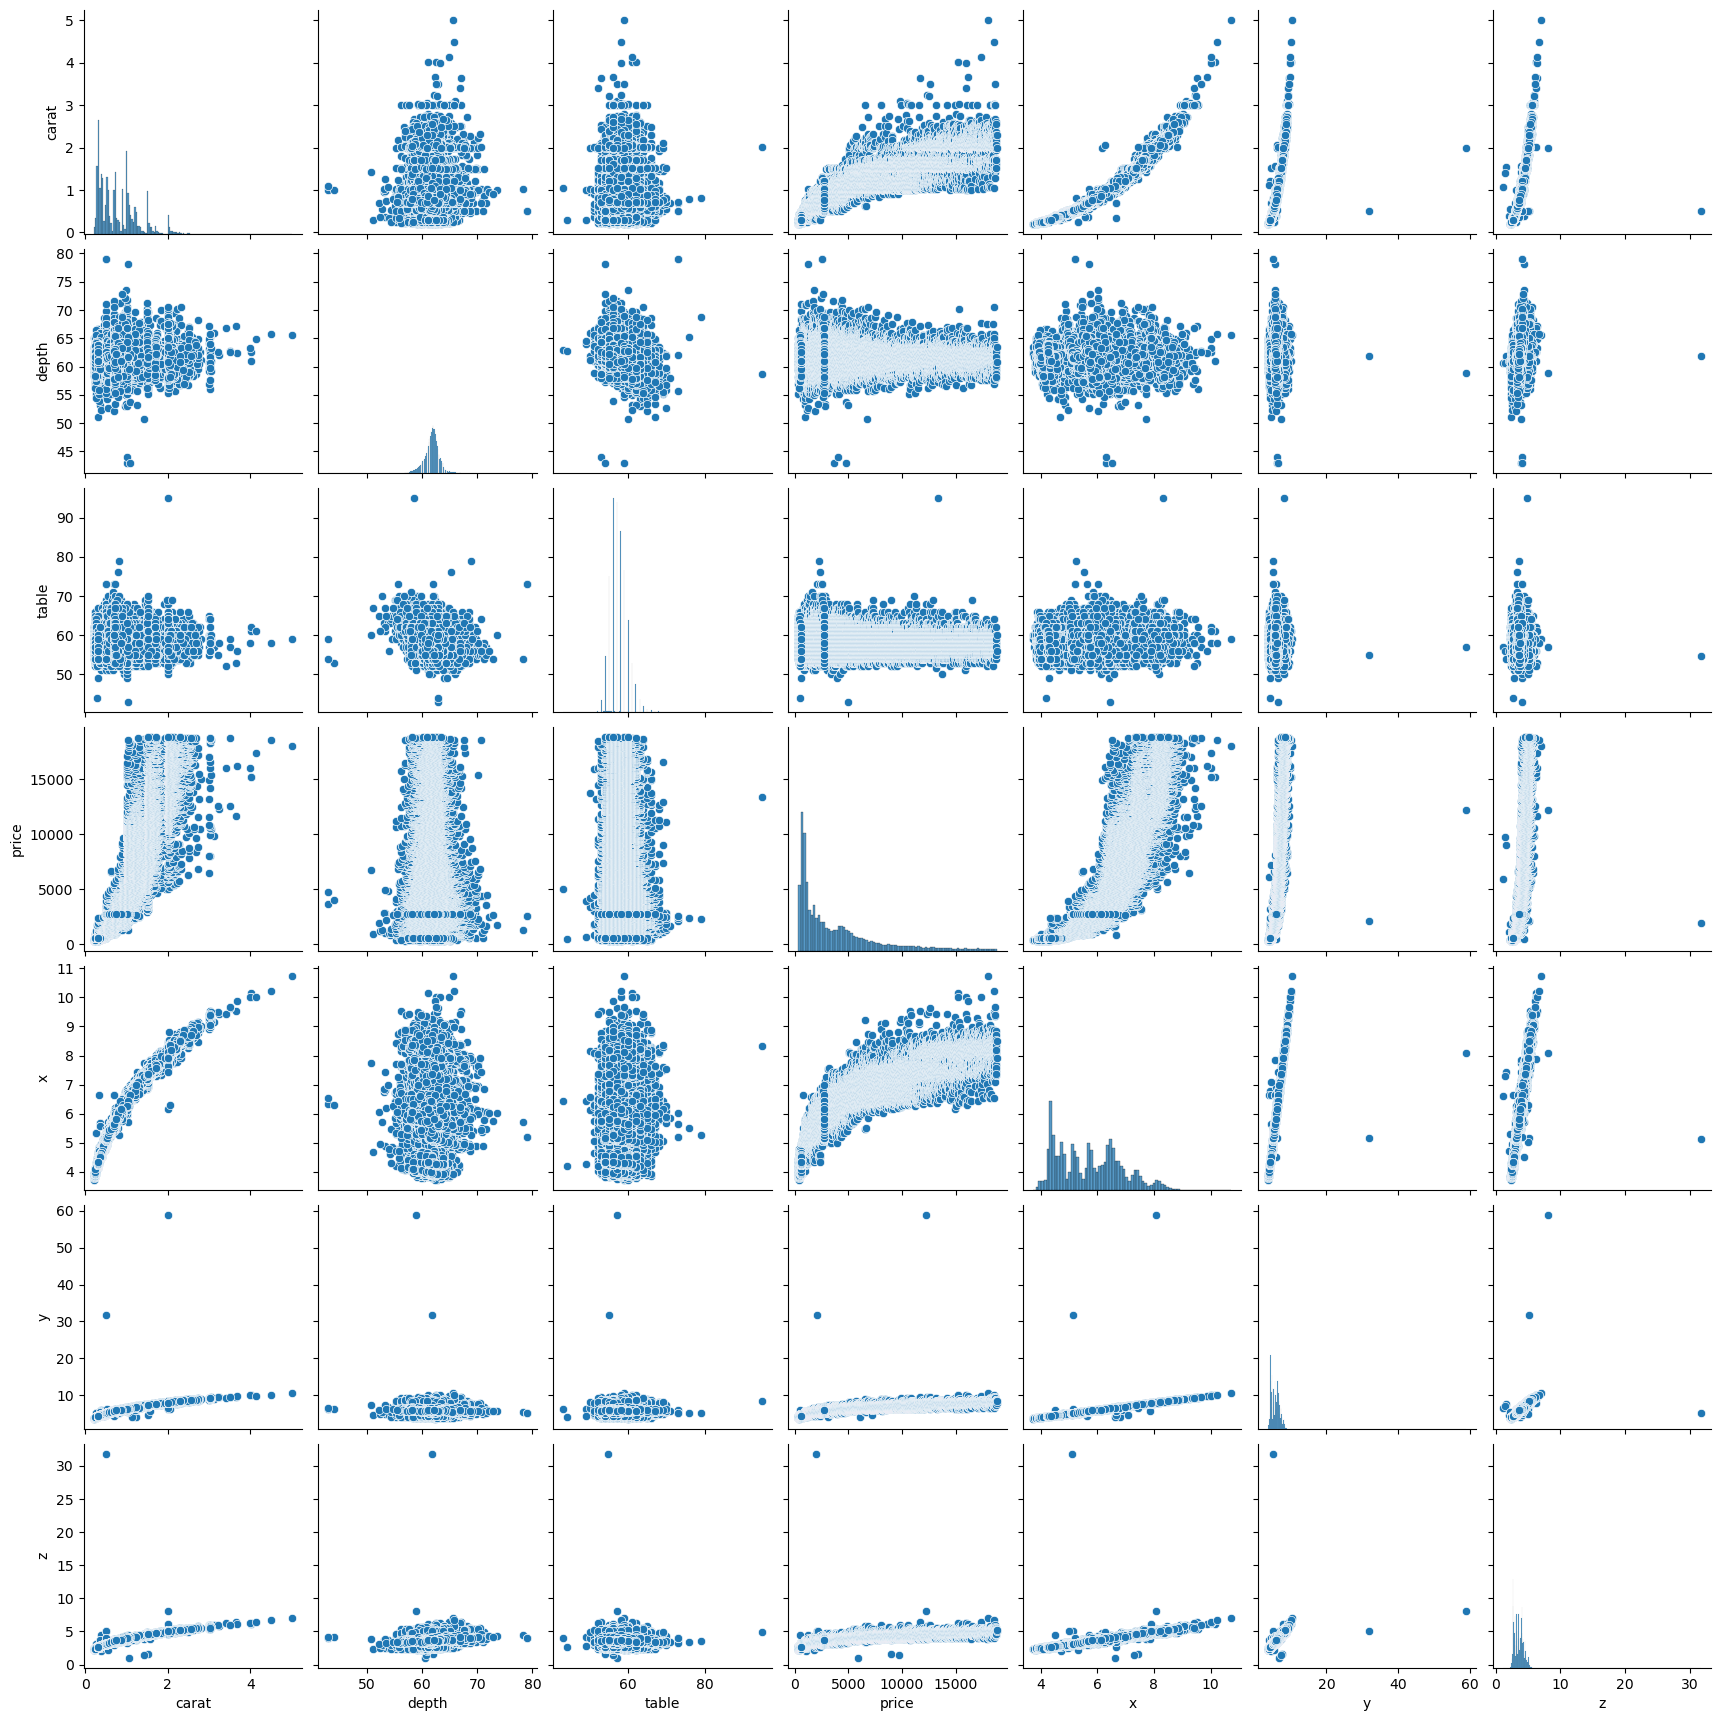

In [11]:
sns.pairplot(df)
plt.show()

* "y" and "z" have some dimensional outlies in our dataset that needs to be eliminated.
* The "depth" should be capped but we must examine the regression line to be sure.
* The "table" featured should be capped too.
* Let's have a look at regression plots to get a close look at the outliers.

C:\Users\Hello\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


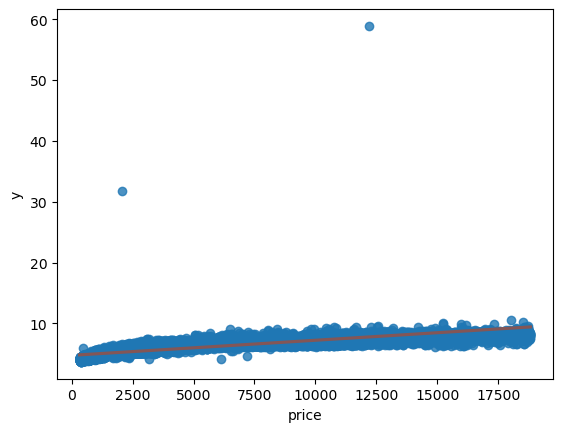

In [12]:
sns.regplot(df['price'],df['y'],line_kws={"color": "#835656"})
plt.show()

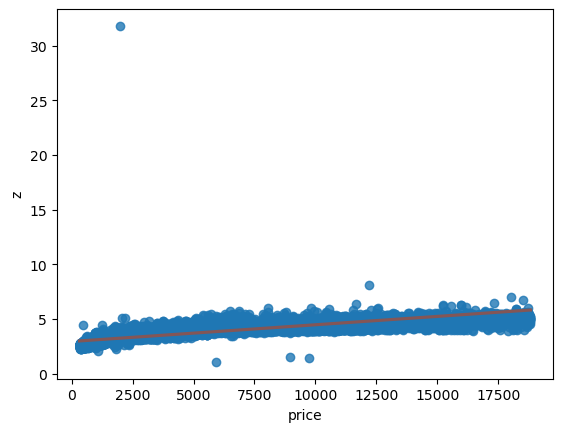

In [13]:
sns.regplot(x="price", y="z", data=df, fit_reg=True, line_kws={"color": "#835656"})
plt.show()

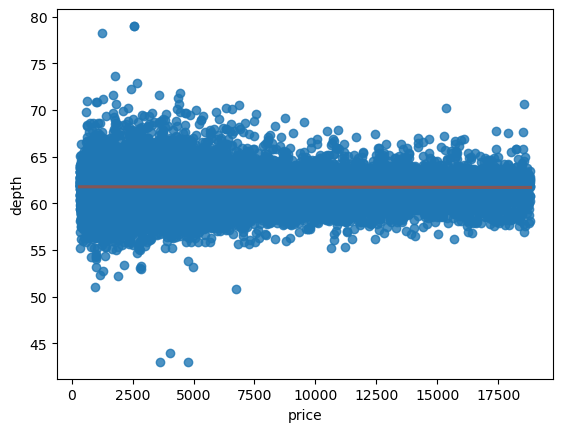

In [14]:
sns.regplot(x="price", y="depth", data=df, fit_reg=True, line_kws={"color": "#835656"})
plt.show()

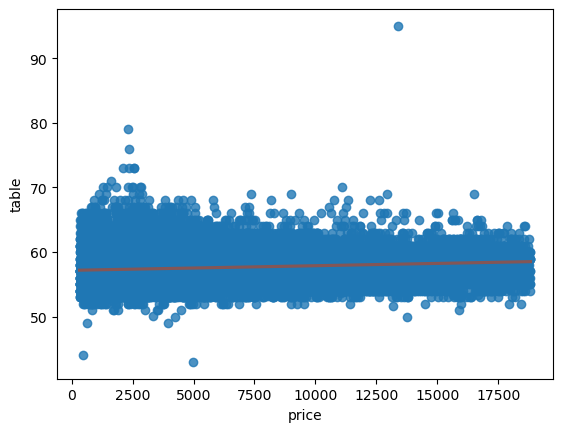

In [15]:
sns.regplot(x="price", y="table", data=df, fit_reg=True, line_kws={"color": "#835656"})
plt.show()

In [16]:
#Dropping the outliers. 
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(53907, 10)

Let's look at pairplot after removing outliers

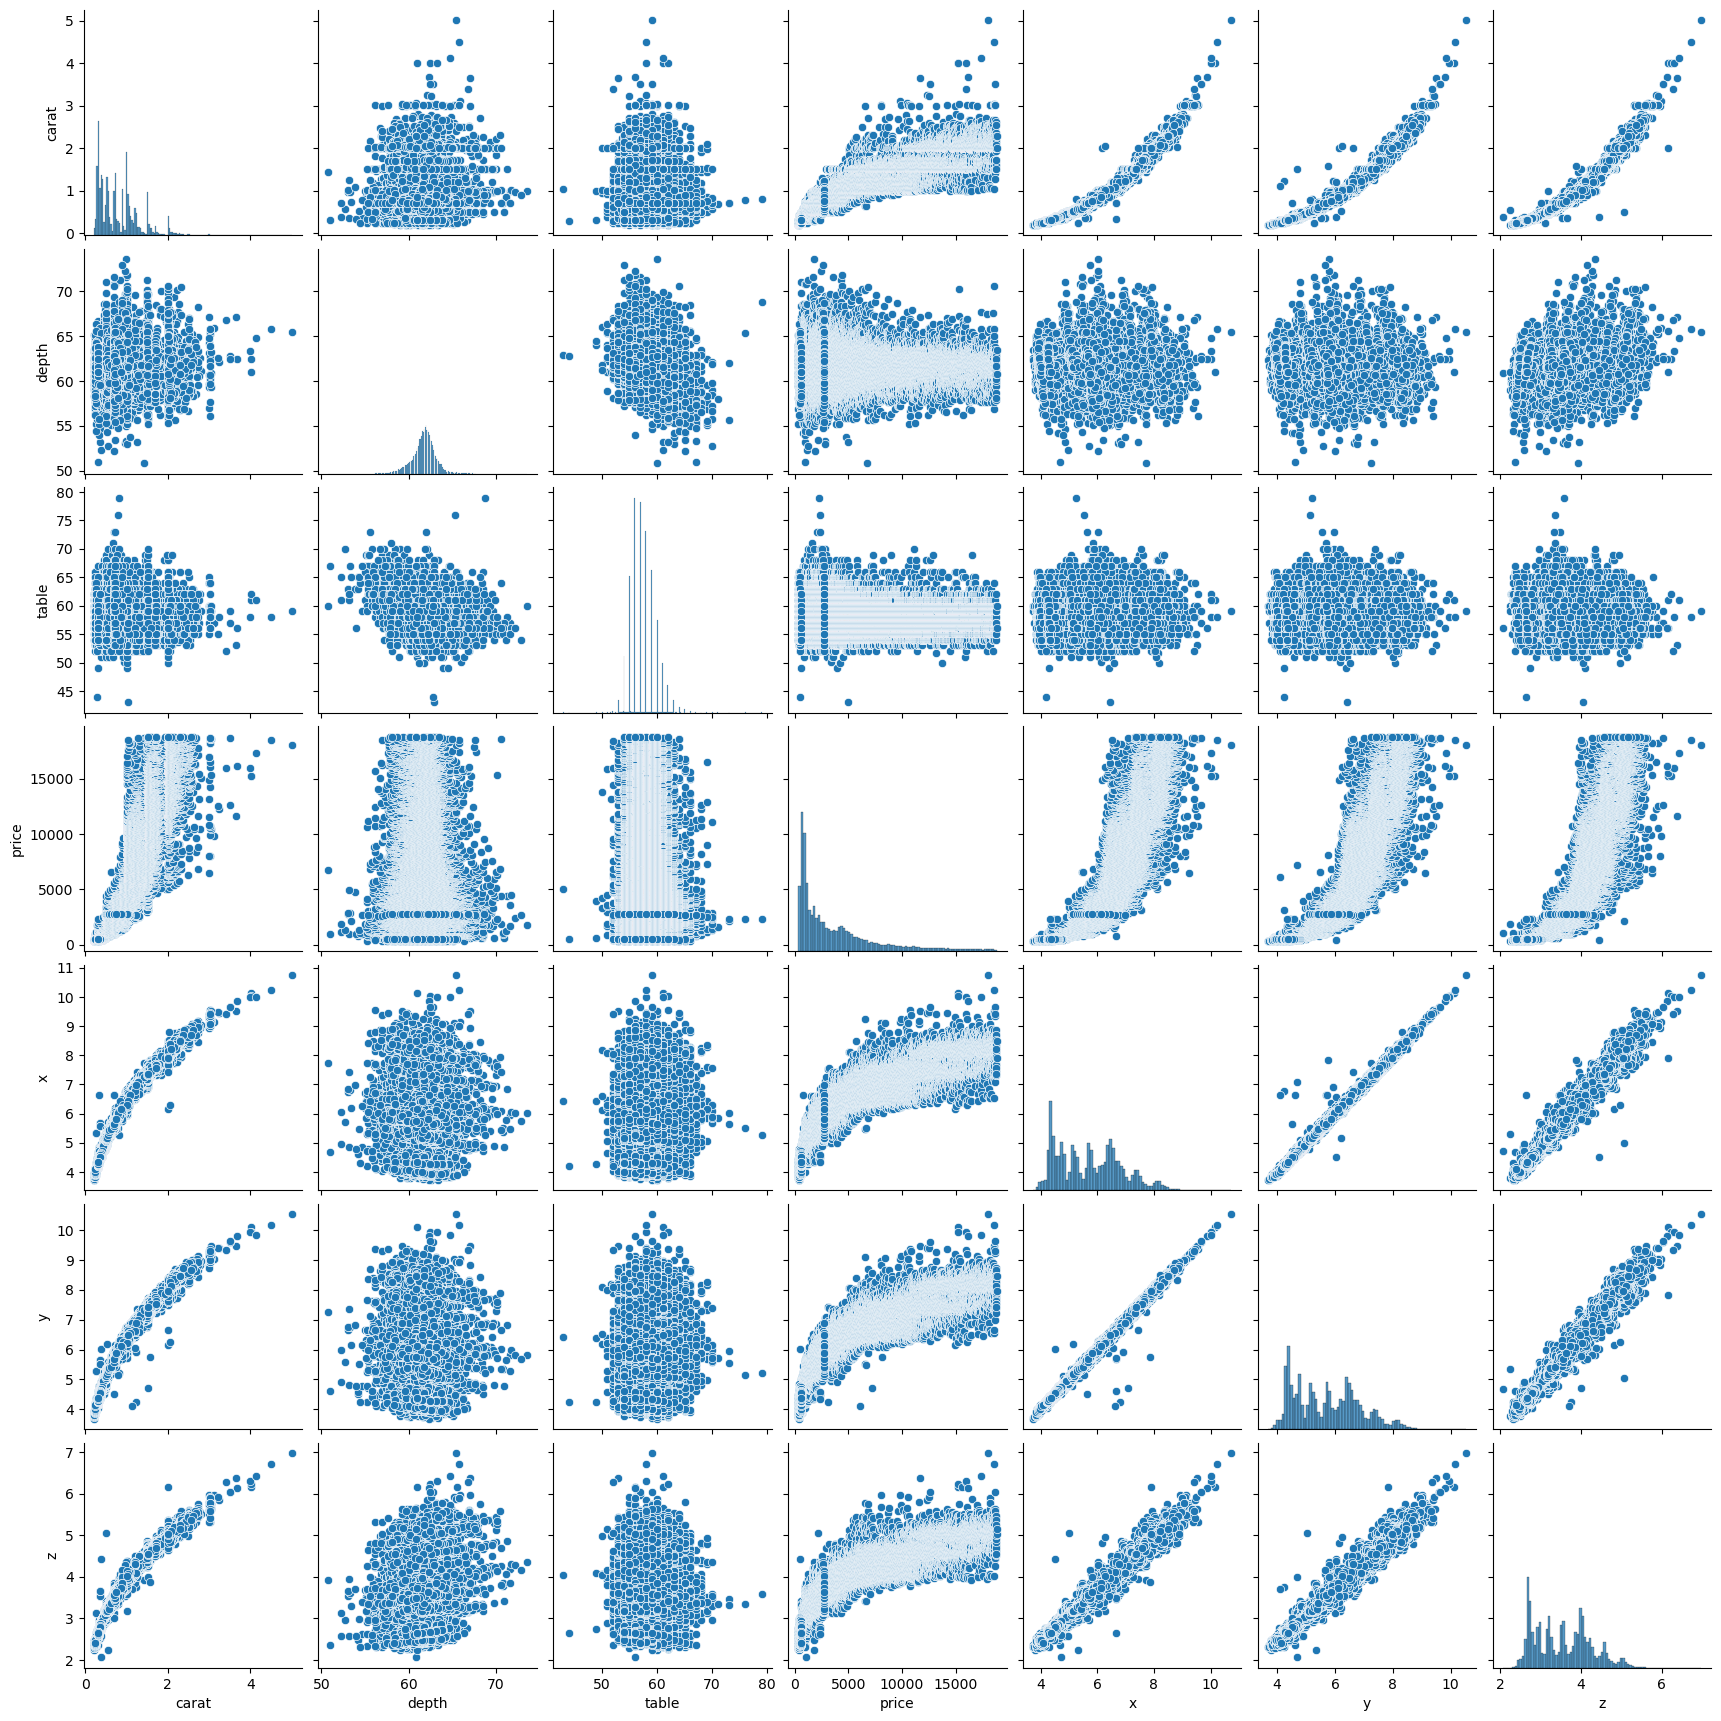

In [17]:
sns.pairplot(df)
plt.show()

That's a much cleaner dataset. Next, we will deal with the categorical variables.

In [18]:
#  List of categorical Features
cat_cols = df.select_dtypes(object).columns
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

C:\Users\Hello\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


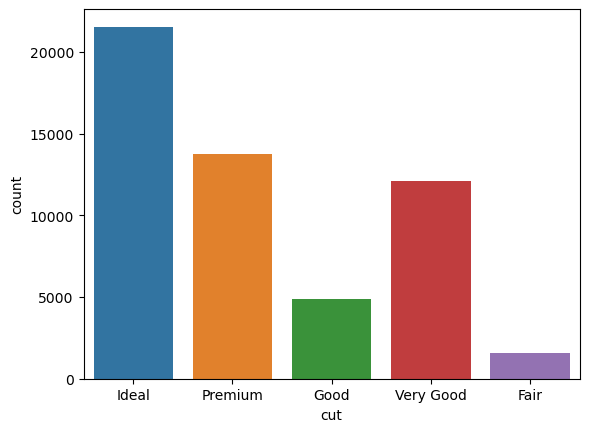

C:\Users\Hello\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


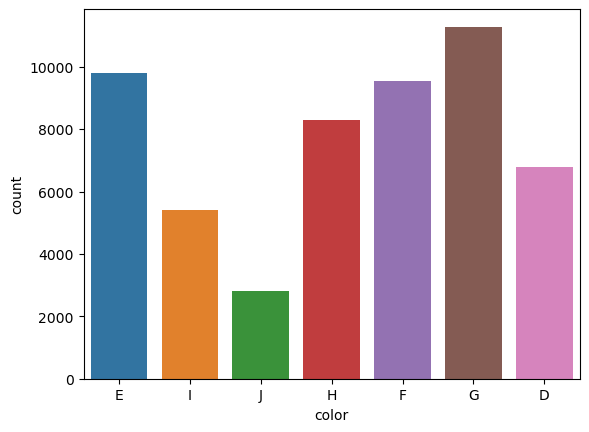

C:\Users\Hello\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


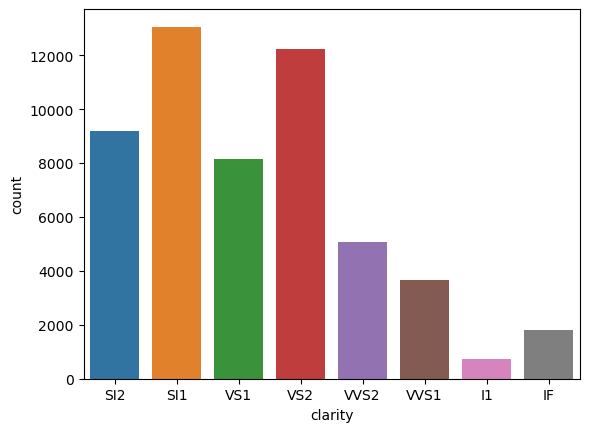

In [19]:
for i in cat_cols:
    sns.countplot(df[i])
    plt.show()

In [20]:
# Apply label encoder to each column with categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


Let's check correlation

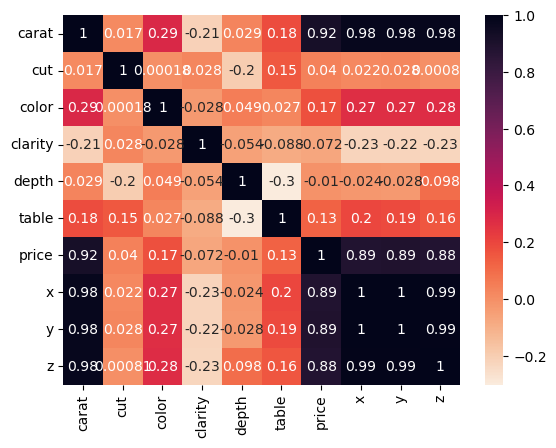

In [21]:
sns.heatmap(df.corr(),annot=True,cmap='rocket_r')
plt.show()

* "x", "y", "z" and "carat" show a high correlation to the target column.
* "depth" and "table" show low correlation. We could consider dropping but let's keep it.

# Model Building

**Steps involved in Model Building**

* Setting up features and target
* Fit all the models on training data
* Fit the best model on the training set and get

In [22]:
# Assigning the features and trarget
from sklearn.model_selection import train_test_split
feature = df.drop(columns='price')
target = df['price']
xtrain,xtest,ytrain,ytest = train_test_split(feature,target,test_size=0.25,random_state=7)

# Importing  Libraries

In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

# Building model and checking accuracy

# Linear Regression

In [31]:
lr = LinearRegression().fit(xtrain,ytrain)
y_train_pred=lr.predict(xtrain)
y_test_pred=lr.predict(xtest)

In [40]:
def model_performance(y_actual,y_pred):
    print("r2_score: ",r2_score(y_actual,y_pred),"|","RMSE: ",np.sqrt(mean_squared_error(y_actual,y_pred)))

In [41]:
print('Train performace')
print(model_performance(ytrain,y_train_pred))
print("Test Performance")
print(model_performance(ytest,y_test_pred))

Train performace
r2_score:  0.886288619253774 | RMSE:  1347.4551045948938
None
Test Performance
r2_score:  0.8890105065854335 | RMSE:  1319.5391876733731
None


# Ridge

In [53]:
l2 = Ridge(alpha=0.1).fit(xtrain,ytrain)
y_train_pred=l2.predict(xtrain)
y_test_pred=l2.predict(xtest)

In [54]:
print('Train performace')
print(model_performance(ytrain,y_train_pred))
print("Test Performance")
print(model_performance(ytest,y_test_pred))

Train performace
r2_score:  0.8862885841420345 | RMSE:  1347.4553126281119
None
Test Performance
r2_score:  0.889013350459501 | RMSE:  1319.5222823465717
None


# Lasso

In [57]:
l1 = Lasso(alpha=0.01).fit(xtrain,ytrain)
y_train_pred_l1=l1.predict(xtrain)
y_test_pred_l1=l1.predict(xtest)

C:\Users\Hello\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.612e+10, tolerance: 6.455e+07
  model = cd_fast.enet_coordinate_descent(


In [58]:
print("Train Performance")
print(model_performance(ytrain,y_train_pred_l1))
print("Test Performance")
print(model_performance(ytest,y_test_pred_l1))

Train Performance
r2_score:  0.8862236114008086 | RMSE:  1347.8402140138564
None
Test Performance
r2_score:  0.8890615881377428 | RMSE:  1319.2355018683966
None


# Decision Tree

In [90]:
dt = DecisionTreeRegressor(max_depth=16,min_samples_split=10).fit(xtrain,ytrain)
y_train_pred_dt=dt.predict(xtrain)
y_test_pred_dt=dt.predict(xtest)

In [91]:
print("Train Performance")
print(model_performance(ytrain,y_train_pred_dt))
print("Test Performance")
print(model_performance(ytest,y_test_pred_dt))

Train Performance
r2_score:  0.9921124140085891 | RMSE:  354.88234235916707
None
Test Performance
r2_score:  0.9728127934658941 | RMSE:  653.0758901752455
None


# Random Forest

In [92]:
rf = RandomForestRegressor().fit(xtrain,ytrain)
y_train_pred_rf=rf.predict(xtrain)
y_test_pred_rf=rf.predict(xtest)


In [93]:
print("Train Performance")
print(model_performance(ytrain,y_train_pred_rf))
print("Test Performance")
print(model_performance(ytest,y_test_pred_rf))

Train Performance
r2_score:  0.9974047977161158 | RMSE:  203.56257918509016
None
Test Performance
r2_score:  0.9808091275370605 | RMSE:  548.6921128154013
None


# Adaboost

In [95]:
ab=AdaBoostRegressor().fit(xtrain,ytrain)
y_train_pred_ab=ab.predict(xtrain)
y_test_pred_ab=ab.predict(xtest)

In [96]:
print("Train Performance")
print(model_performance(ytrain,y_train_pred_ab))
print("Test Performance")
print(model_performance(ytest,y_test_pred_ab))

Train Performance
r2_score:  0.896112387102601 | RMSE:  1287.935817572828
None
Test Performance
r2_score:  0.8955785968194879 | RMSE:  1279.9002392630775
None


# GradientBoosting

In [98]:
gb=GradientBoostingRegressor().fit(xtrain,ytrain)
y_train_pred_gb=gb.predict(xtrain)
y_test_pred_gb=gb.predict(xtest)

In [99]:
print("Train Performance")
print(model_performance(ytrain,y_train_pred_gb))
print("Test Performance")
print(model_performance(ytest,y_test_pred_gb))

Train Performance
r2_score:  0.9740803357406698 | RMSE:  643.3199556986459
None
Test Performance
r2_score:  0.9721680044501608 | RMSE:  660.7748898786807
None


# XGB

In [101]:
xgb=XGBRegressor()
xgb.fit(xtrain,ytrain)
y_train_pred_xgb=xgb.predict(xtrain)
y_test_pred_xgb=xgb.predict(xtest)

In [102]:
print("Train Performance")
print(model_performance(ytrain,y_train_pred_xgb))
print("Test Performance")
print(model_performance(ytest,y_test_pred_xgb))

Train Performance
r2_score:  0.9914539816204236 | RMSE:  369.3977524735887
None
Test Performance
r2_score:  0.9810972164886016 | RMSE:  544.5581197831302
None


In [103]:
r2score = {'Linear regression':0.8890105065854335,
           'Ridge':0.889013350459501,
           'Lasso':0.8890615881377428 ,
           'Decision Tree':0.9728127934658941 ,
           'Random Forest':0.9808091275370605 ,
           'Adaboost':0.8955785968194879 ,
           'GradientBoosting':0.9721680044501608 ,
           'XGB':0.9810972164886016
          }

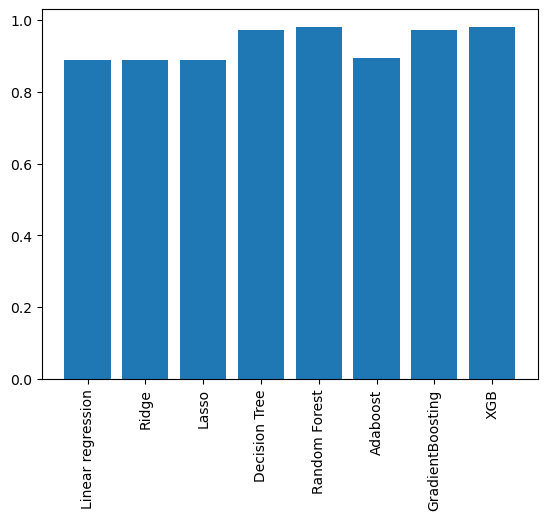

In [109]:
plt.bar(r2score.keys(),r2score.values())
plt.xticks(rotation=90)
plt.show()

# From all the above Regression models the best r2score we got was for XGB 0.9810972164886016